In [1]:
import pandas as pd
import numpy as np

import os
from os.path import isfile, join
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "red", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

# Charge tranfer 

In this script,  I will merge data from the **Analysis-(Output_Script-14.0)_Charge-Transfer** and **Analysis-(Output_script-12.0)_Shakti_VertexCount-Free** to build the definitive charge transfer plot.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Analysis"

In [3]:
shakti = pd.read_csv(join(data_directory,'final-Charge_shakti.dat'), sep = "\t", index_col = [0,1])
other_lattices = pd.read_csv(join(data_directory,'charge_transfer_vs_theta.dat'), sep = "\t", index_col = [0,1])

In [4]:
other_lattices

number  fraction       err   time  charge  \
theta    coordination                                              
0.523599 3              420.0       1.0  0.004538  10000       0   
         4              225.0       1.0  0.007463  10000       4   
0.492432 3              450.0       1.0  0.004858  10000       0   
         4              225.0       1.0  0.006932  12500       0   
0.461266 3              450.0       1.0  0.004467  10000       0   
         4              225.0       1.0  0.006531  12500       0   
0.430099 3              450.0       1.0  0.004340  10000       0   
         4              225.0       1.0  0.006097  10000      -4   
0.398932 3              420.0       1.0  0.005430  10000       0   
         4              225.0       1.0  0.007358  10000      -4   
0.367766 3              435.0       1.0  0.005247  10000       0   
         4              225.0       1.0  0.007775  10000      -4   
0.336599 3              420.0       1.0  0.006594  10000       0   
         4              225.0       1.0  0.009070  10000      -4   
0.305433 3              420.0       1.0  0.006385  10000       0   
         4              225.0       1.0  0.007879  10000      -4   
0.274266 3              420.0       1.0  0.006044  10000       0   
         4              225.0       1.0  0.007748  10000      -4   
0.243099 3              450.0       1.0  0.006868  10000       0   
         4              225.0       1.0  0.008802  10000      -4   
0.211933 3              435.0       1.0  0.007792  10000       0   
         4              225.0       1.0  0.007681  10000      -4   
0.180766 3              450.0       1.0  0.007706  10000       0   
         4              225.0       1.0  0.008394   7500      -6   
0.149600 3              435.0       1.0  0.007833  10000       0   
         4              225.0       1.0  0.006910  10000      -4   
0.118433 3              420.0       1.0  0.007254   7500       3   
         4              225.0       1.0  0.008446   7500      -6   
0.087266 3              420.0       1.0  0.007541  10000       0   
         4              225.0       1.0  0.008532   7500      -6   

                       fraction*charge  theta_deg  
theta    coordination                              
0.523599 3                   -0.096762  30.000000  
         4                    0.187556  30.000000  
0.492432 3                   -0.039289  28.214286  
         4                    0.070222  28.214286  
0.461266 3                    0.024533  26.428571  
         4                   -0.048000  26.428571  
0.430099 3                    0.068711  24.642857  
         4                   -0.142933  24.642857  
0.398932 3                    0.158667  22.857143  
         4                   -0.319289  22.857143  
0.367766 3                    0.297839  21.071429  
         4                   -0.601956  21.071429  
0.336599 3                    0.430571  19.285714  
         4                   -0.860622  19.285714  
0.305433 3                    0.569333  17.500000  
         4                   -1.146489  17.500000  
0.274266 3                    0.693048  15.714286  
         4                   -1.387378  15.714286  
0.243099 3                    0.796622  13.928571  
         4                   -1.606044  13.928571  
0.211933 3                    0.880460  12.142857  
         4                   -1.768356  12.142857  
0.180766 3                    0.957333  10.357143  
         4                   -1.912533  10.357143  
0.149600 3                    1.021517   8.571429  
         4                   -2.040356   8.571429  
0.118433 3                    1.076667   6.785714  
         4                   -2.156267   6.785714  
0.087266 3                    1.135333   5.000000  
         4                   -2.275022   5.000000

In [5]:
shakti['theta'] = 0
shakti = shakti.reset_index()

In [6]:
shakti = shakti.set_index(['theta','coordination'])

In [7]:
df = pd.concat([other_lattices,shakti])

In [8]:
df['theta_deg'] = df.index.get_level_values('theta')*180/np.pi

In [9]:
del df['number']
del df['fraction']
del df['time']
del df['charge']

Text(0, 0.5, '$\\sum_{q} n_{z=3,4}q$')

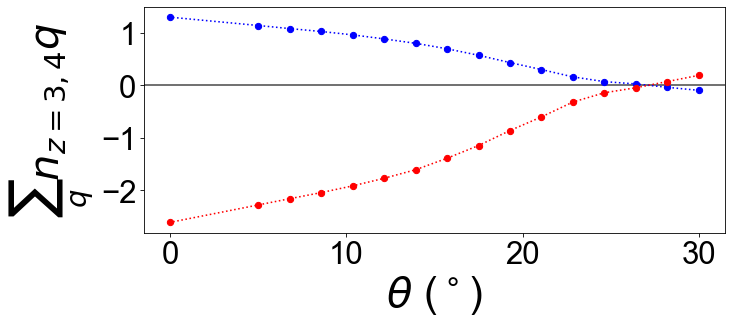

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(10,4))


for typ_m, mtype in df.groupby(['coordination']):
    
    plt.errorbar(mtype['theta_deg'], mtype['fraction*charge'],yerr = mtype['err'], fmt =':o', label = typ_m)

plt.yticks(fontsize=30, ticks=[-2,-1,0,1])
plt.tick_params(axis='x', labelsize=30)  
#plt.legend(title = 'lattice coordination', fontsize = 15, title_fontsize = 15)
#plt.legend(title = 'lattice coordination', fontsize = 25, bbox_to_anchor=(1, 1), title_fontsize = 20)
plt.axhline(y=0, color='black',alpha = 0.7, linestyle='-')
plt.xlabel(r'$\theta$ ($^\circ$)', size = 40)
plt.ylabel(r'$\sum_{q} n_{z=3,4}q$', size = 40)

In [12]:
df.to_csv('charge-transfer_by_changing-theta.dat', sep = '\t')